In [9]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from util import load_json,normalization,body_drawing

In [10]:
adress_raw_data = load_json('./dataset/address.json')
not_adress_raw_data = load_json('./dataset/not_address.json')

In [11]:
# Load Json 데이터
label = []
keypoints = []

for address in adress_raw_data:
    label.append(address['label'])
    keypoints.append(address['keypoints'])

for not_address in not_adress_raw_data:
    label.append(not_address['label'])
    keypoints.append(not_address['keypoints'])


keypoints = np.array(keypoints) # (N,17,2) ->  인풋
label = np.array(label) # (N,1) -> 아웃풋
 
print(keypoints.shape)
print(label.shape)

(336, 17, 2)
(336,)


<img src="./explain_img/image.png" width="500" height="500">

**util.py에서 normalization함수 참고**

In [15]:
normalized_keypoints = normalization(keypoints)
print(normalized_keypoints.shape)

(336, 17, 2)


### 시각화

Text(0.5, 1.0, 'normalized')

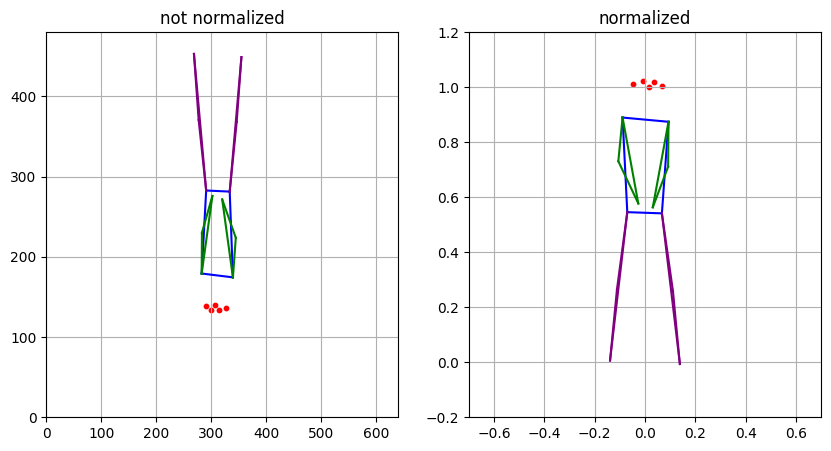

In [17]:
# Address
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
body_drawing(keypoints[0])
plt.xlim(0,640)
plt.ylim(0,480)
plt.title('not normalized')

plt.subplot(1,2,2)
body_drawing(normalized_keypoints[0])
plt.xlim(-0.7, 0.7)
plt.ylim(-0.2, 1.2)
plt.title('normalized')

Text(0.5, 1.0, 'normalized')

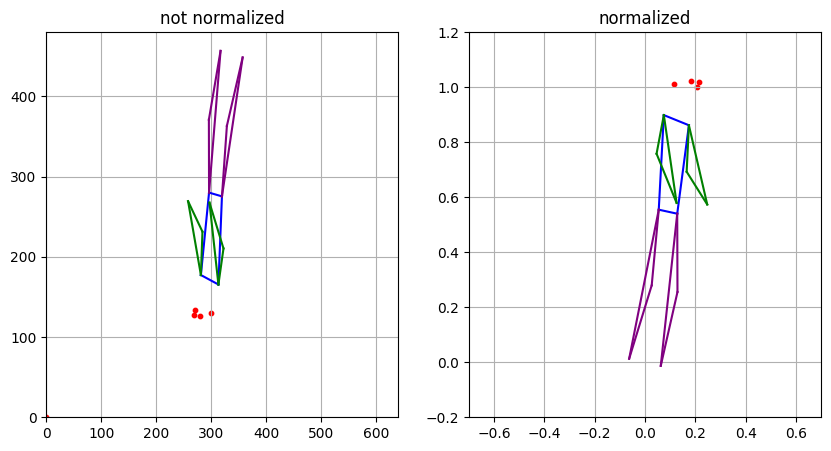

In [21]:
# Not Address
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
body_drawing(keypoints[300])
plt.xlim(0,640)
plt.ylim(0,480)
plt.title('not normalized')

plt.subplot(1,2,2)
body_drawing(normalized_keypoints[300])
plt.xlim(-0.7, 0.7)
plt.ylim(-0.2, 1.2)
plt.title('normalized')